In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.svm import SVC

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
from sklearn import datasets

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

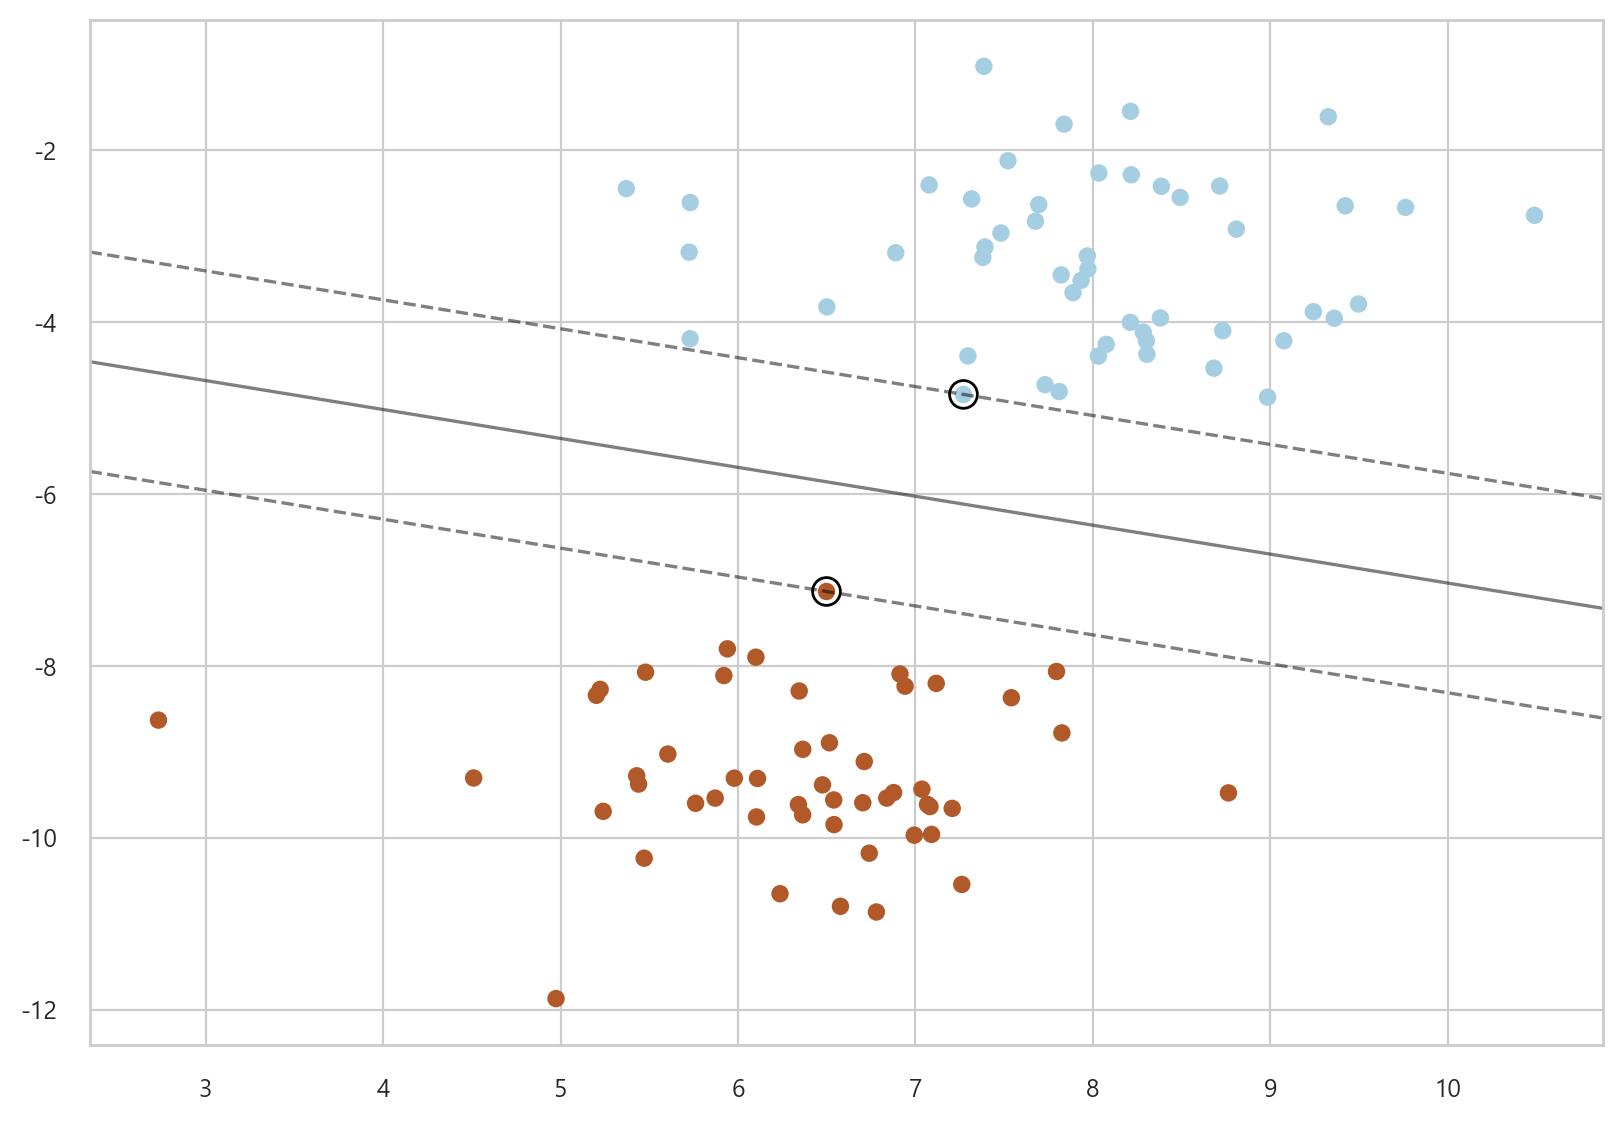

In [4]:
# 임의의 데이터셋 생성
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# SVM 분류기 모델 생성 및 학습
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)

# 데이터 포인트와 결정 경계 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# 결정 경계
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 그리드 생성
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# 결정 경계와 마진 플로팅
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# 서포트 벡터 플로팅
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()
